<a href="https://colab.research.google.com/github/VSharma27/MAJOR-PROJECT-2-15-04-2022-/blob/main/LOGISTIC_REGRESSION_MAJOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

**Reading Dataset**

In [7]:
# Reading the dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Understanding the Dataset**

In [8]:
df.shape

(284807, 31)

In [9]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Checking for Missing Values**

In [12]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [13]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [14]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [15]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

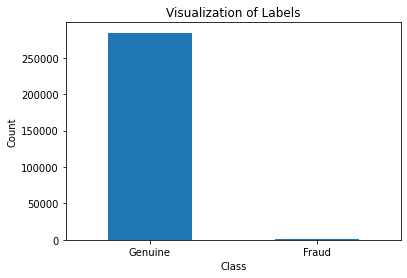

In [16]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [17]:
df.drop('Time', axis=1, inplace=True)

In [18]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [19]:
# Putting target variable to y
y = df['Class']

**Checking the Skewness**

In [20]:
# Listing the columns
cols = X.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

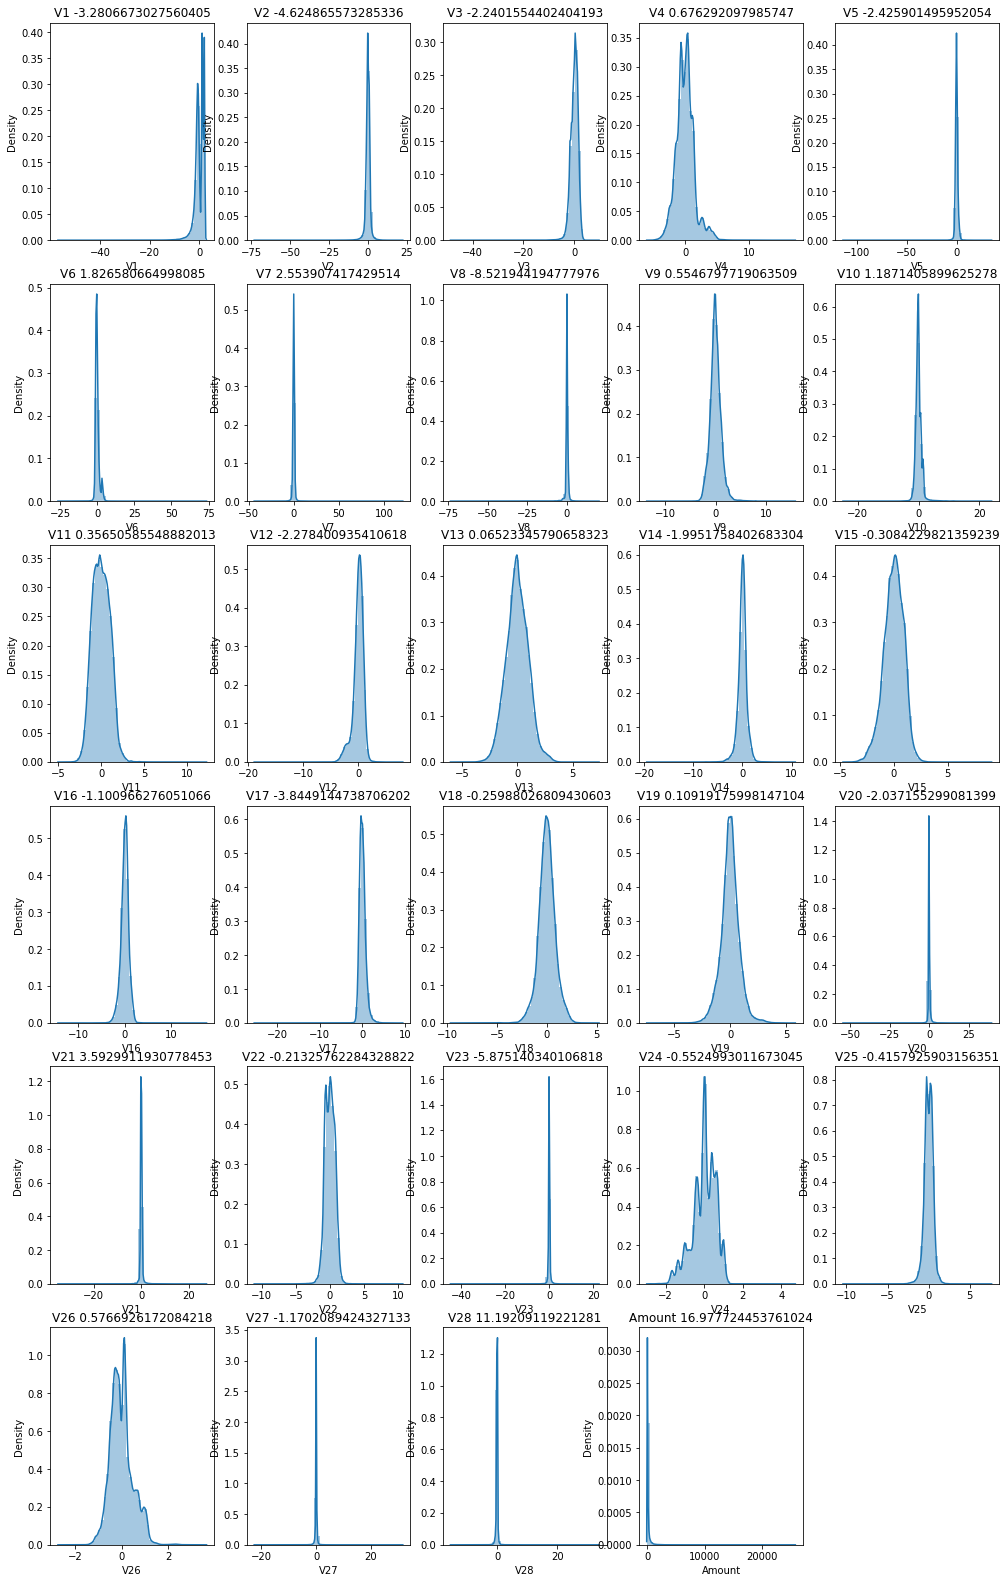

In [21]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

**Mitigate skewness with PowerTransformer**

In [22]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X[cols] = pt.fit_transform(X)

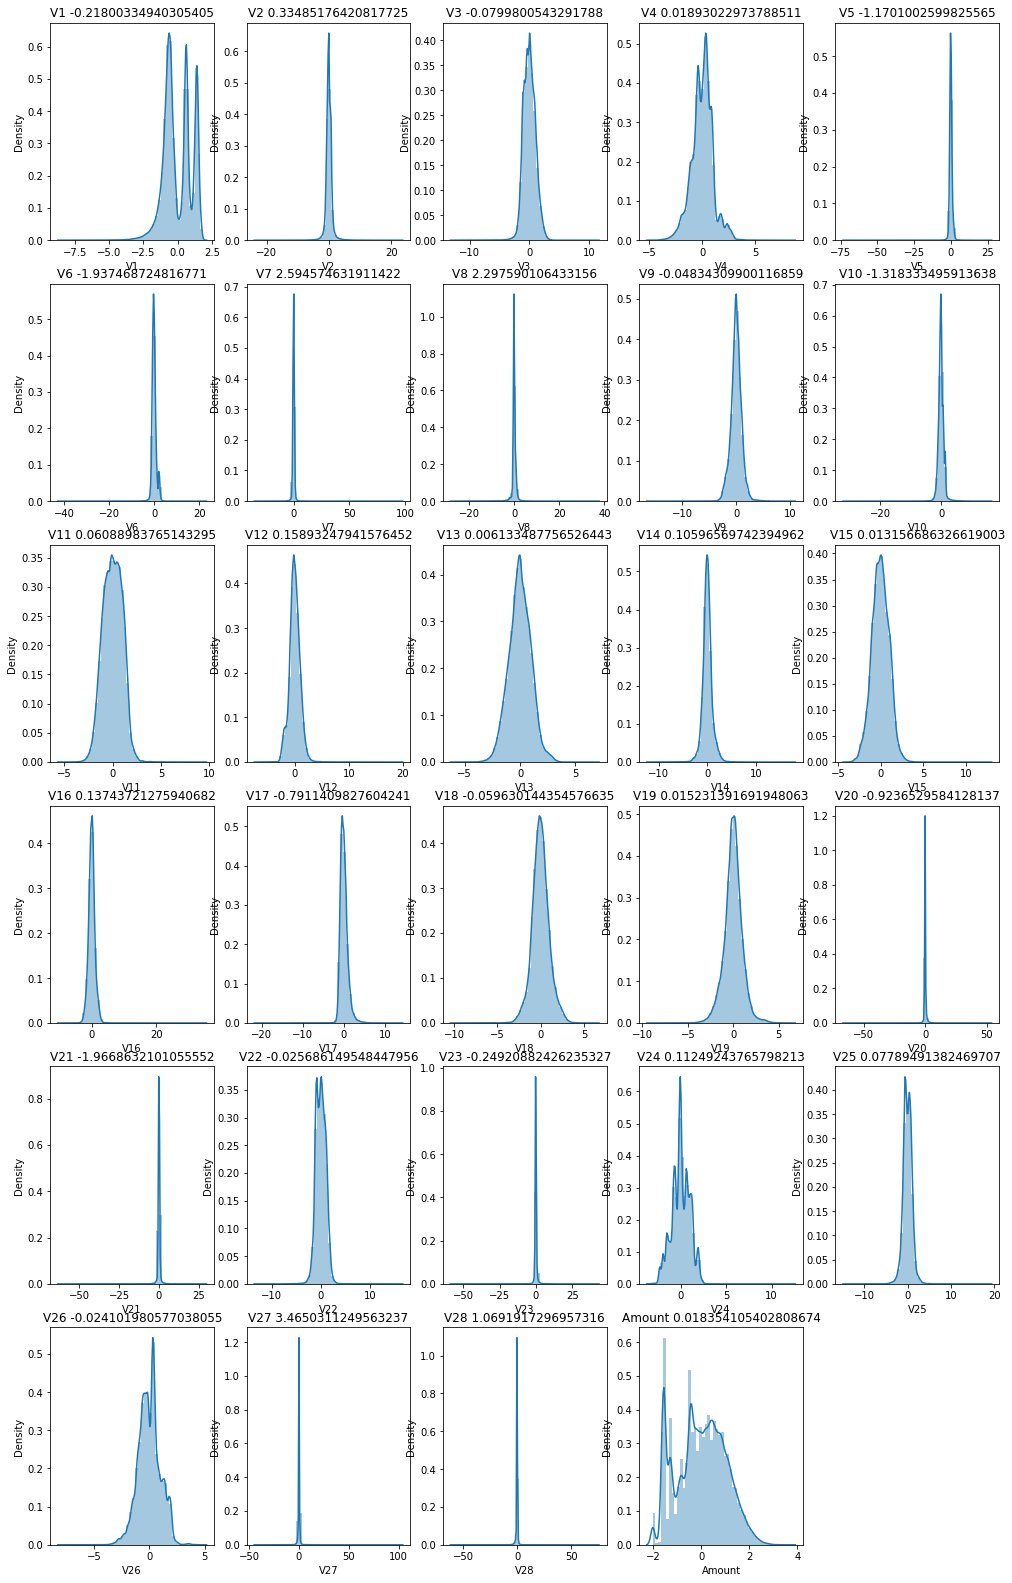

In [24]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

**Splitting of Dataset**

In [25]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=200)

In [26]:
# Instantiate the Scaler
scaler = StandardScaler()

In [27]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [28]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
52820,0.609997,-0.167046,0.341444,0.241441,-0.464017,-0.298190,-0.195399,-0.188800,0.383150,-0.170055,-0.524431,0.547160,1.206443,-0.248862,1.510952,0.743744,-0.879803,-0.166400,-0.023231,0.139807,-0.101094,-0.443930,-0.041187,-0.206910,0.336927,0.995528,-0.084394,0.100391,0.596075
263369,1.452145,-0.156509,-0.817316,0.373670,-0.173927,-1.013700,0.102945,-0.347044,0.644199,0.133850,-0.857447,-0.190138,-0.787257,0.427591,0.090124,-0.158535,-0.318577,-0.919214,0.192049,-0.364559,-0.401764,-1.054414,0.564599,-0.060274,-0.654918,0.495583,-0.203487,-0.179633,-1.268009
117614,-1.295206,-0.358828,0.649724,-0.927054,0.218727,-0.060488,0.753962,-0.186807,0.520088,0.538603,1.370474,0.834587,0.432770,-0.489599,0.236800,0.643729,-1.155209,-0.404823,-0.802490,0.197921,-0.446775,-0.065840,0.247659,-0.495426,-0.293484,1.481361,1.139574,1.659247,1.256815
51000,-1.030009,-1.086044,0.850925,0.728369,0.816809,-1.143289,-0.745560,0.079236,0.138991,0.258595,0.893058,0.279948,-1.003254,0.306935,-0.001374,-0.921327,0.618754,0.190260,3.084415,0.515673,0.052648,-0.211615,0.676178,0.632259,-1.694279,1.901162,-0.445758,1.709638,0.529873
151957,1.312159,-0.293718,-0.728464,0.379332,-0.172187,-0.432747,-0.120831,-0.272588,1.867121,-0.360322,1.587976,-1.315881,1.258720,2.111031,-1.855039,-0.692798,0.627091,0.263636,0.309702,-0.295345,0.034824,0.675957,0.023010,-0.070889,0.159243,0.367181,-0.166336,-0.214147,0.389813


In [29]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212072,0.921137,-1.053528,-1.790662,-0.210114,0.108071,-0.558267,0.694916,-0.518275,-1.215384,0.981332,0.202716,-0.433118,-0.986162,1.311705,-0.942459,-1.933022,-0.212221,1.784848,-0.406820,0.142877,0.202286,0.048660,-0.705369,0.655772,0.693601,1.788079,-0.531963,-0.097744,1.635491
7676,-1.269728,-0.461630,2.945654,2.351069,-0.360175,1.210538,-1.389357,1.135902,1.608396,0.467764,0.963946,-1.930135,0.168516,0.777681,-2.047418,-0.761236,2.127560,0.942123,1.202938,0.453317,-0.012756,0.866834,-0.807674,-0.063001,0.077913,1.048878,0.823677,-0.804783,0.619568
83150,0.686180,0.088341,0.236924,0.502343,-0.350533,-0.768664,0.057292,-0.279191,0.077405,-0.022772,-0.144843,0.360557,0.455543,0.157651,1.141007,0.278896,-0.542250,-0.677489,-0.138124,-0.113264,-0.341228,-1.010101,0.208261,0.597304,0.397123,0.289025,-0.083867,0.071771,-1.268009
125745,-0.495700,0.214654,1.750156,1.101505,-0.005909,0.862570,-0.072936,0.339463,0.583119,-0.516683,-1.721565,0.316858,-0.263162,-0.847313,-1.424304,-1.601616,1.195076,-1.040406,1.806646,0.009935,-0.440386,-0.665494,-0.094638,-0.765361,-0.643611,-0.844707,0.576616,0.478767,-0.580928
84402,-0.821222,-0.059006,1.013310,0.290647,0.747417,0.141649,0.442719,0.206489,-0.339097,-0.566547,0.557350,0.645692,-0.643096,0.160518,-1.444783,-0.374311,-0.435937,-0.244337,-0.627432,0.096309,0.167998,0.161777,-0.025932,-0.608289,0.360703,-1.055415,0.174672,0.380021,0.695457


In [30]:
X_train.isnull().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
dtype: bool

**Building SMOTE**

In [31]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [32]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454894, 29)


In [33]:
from collections import Counter
counter=Counter(y_train_smote)
print('After Applying SMOTE', counter)

After Applying SMOTE Counter({0: 227447, 1: 227447})


**Building Logistic Regression Model**

In [34]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params

params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
          'penalty':['l1', 'l2', 'elasticnet', 'none'],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }

# Specifing score as roc-auc
model_cv = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params, 
                        n_iter=15,
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=LogisticRegression(), n_iter=15,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

**Finding best value of ALL Parameters**

In [35]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
best_penalty = model_cv.best_params_['penalty']
best_solver = model_cv.best_params_['solver']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))
print(" The highest test roc_auc is {0} at penalty = {1}".format(best_score, best_penalty))
print(" The highest test roc_auc is {0} at solver = {1}".format(best_score, best_solver))

 The highest test roc_auc is 0.9883415606127166 at C = 10
 The highest test roc_auc is 0.9883415606127166 at penalty = none
 The highest test roc_auc is 0.9883415606127166 at solver = lbfgs


**Using Best value of parameters**

In [37]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=10,penalty='none',solver='lbfgs')

In [38]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [39]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [40]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55287  1581]
 [    5    89]]


In [41]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

**Predicting on Test Set**

In [42]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [43]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9721568765141674
Sensitivity:- 0.9468085106382979
Specificity:- 0.972198776113104


In [44]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.95      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [45]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]


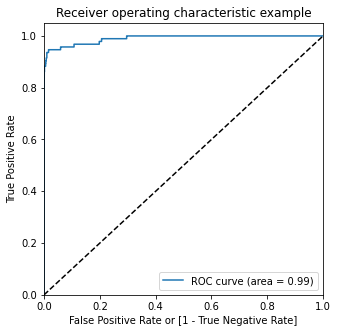

In [46]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)